# cross-section results
after applying the correction for $\phi_\mu \sim 0$ and $\phi_p \sim 0$

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/'

In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


# cross-section with weights-crossing

In [4]:
extract_Xsecs(do_corr_phi_0=True, debug=0, particle='mu',
                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,
                  extra_name="cross-weights",do_cross_weights=True)

saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PmuXsecs_1Dcross-weights.txt


In [5]:
extract_Xsecs(do_corr_phi_0=True, debug=0, particle='p',
                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,
                  extra_name="cross-weights",do_cross_weights=True)

saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PpXsecs_1Dcross-weights.txt


/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_without_last_ctu_bin_cross-weights.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_with_last_ctu_bin_cross-weights.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_without_last_ctu_bin_cross-weights.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_with_last_ctu_bin_cross-weights.pdf


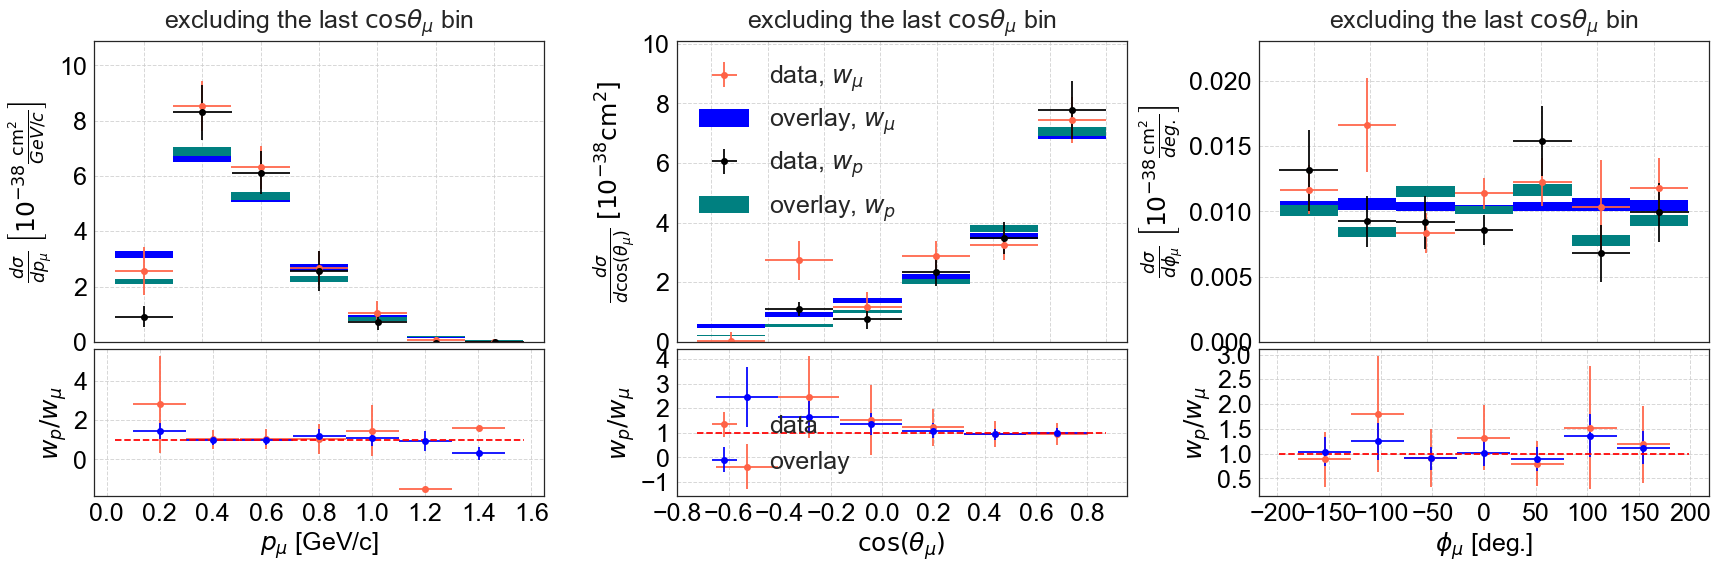

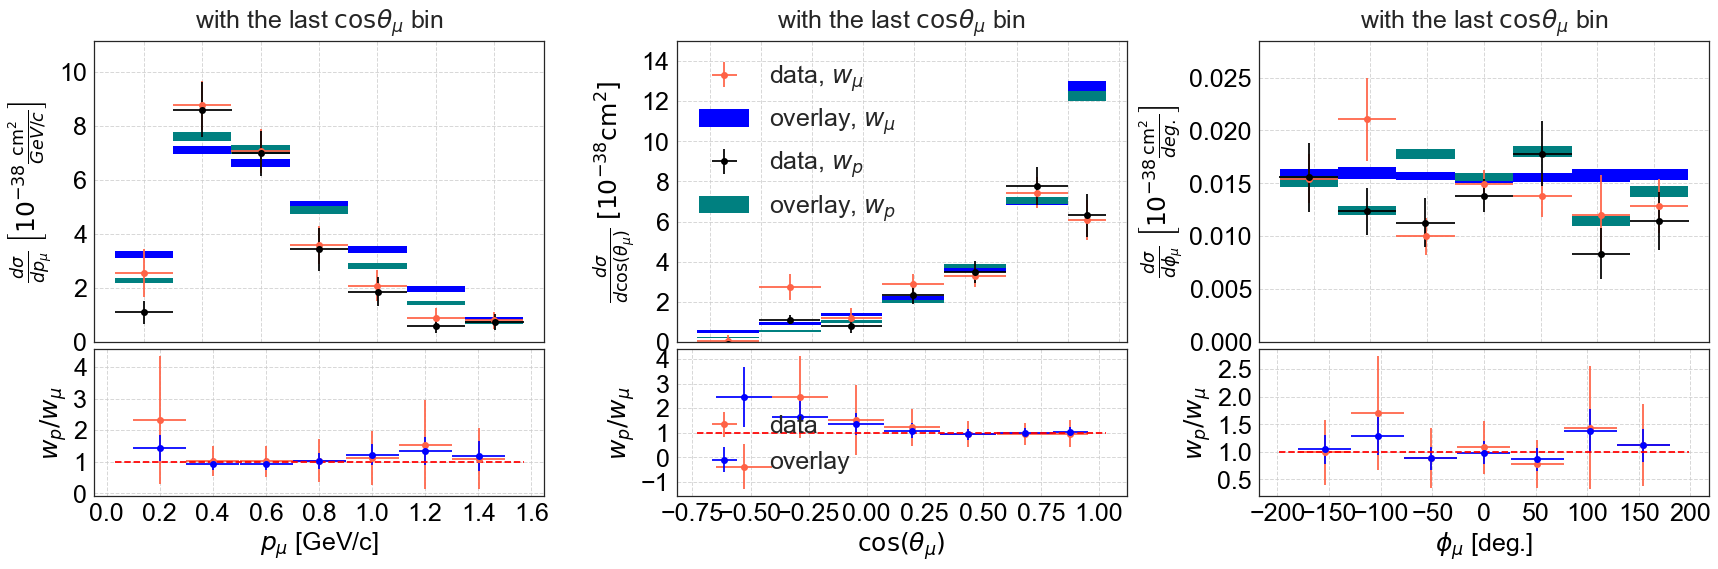

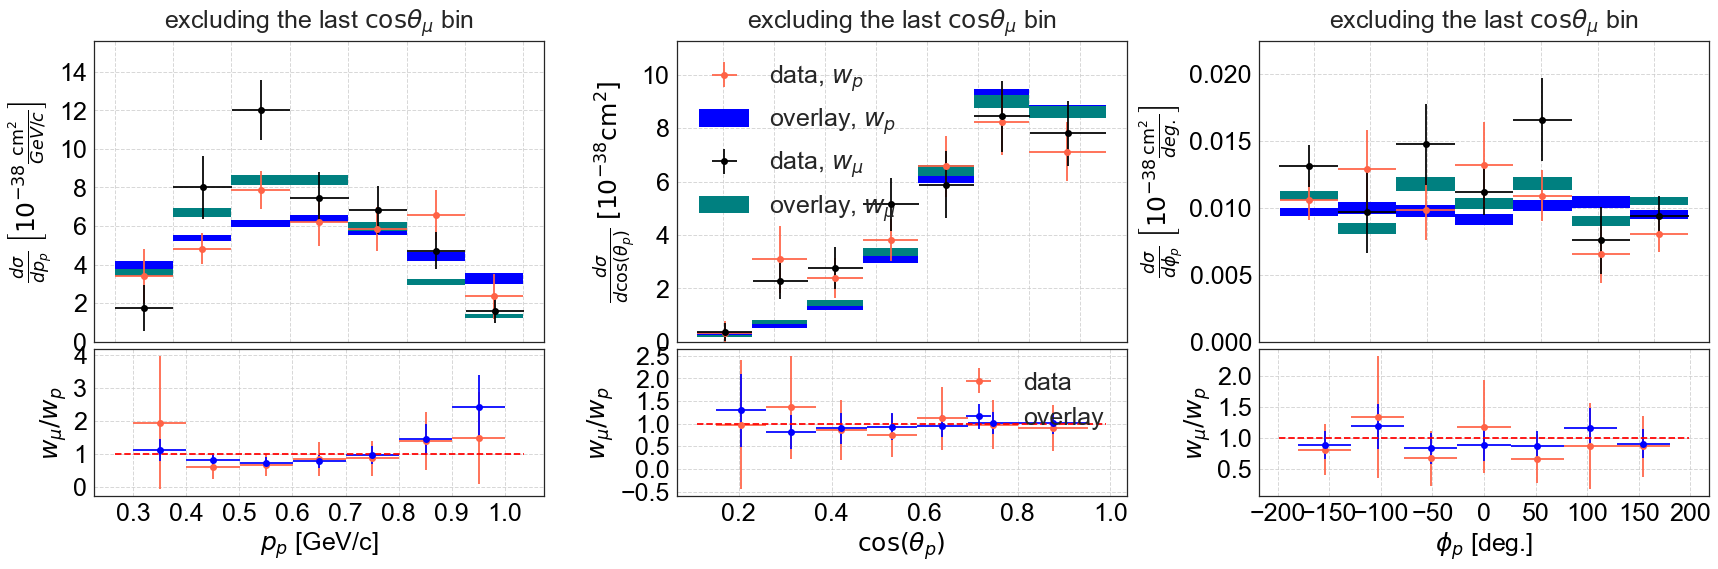

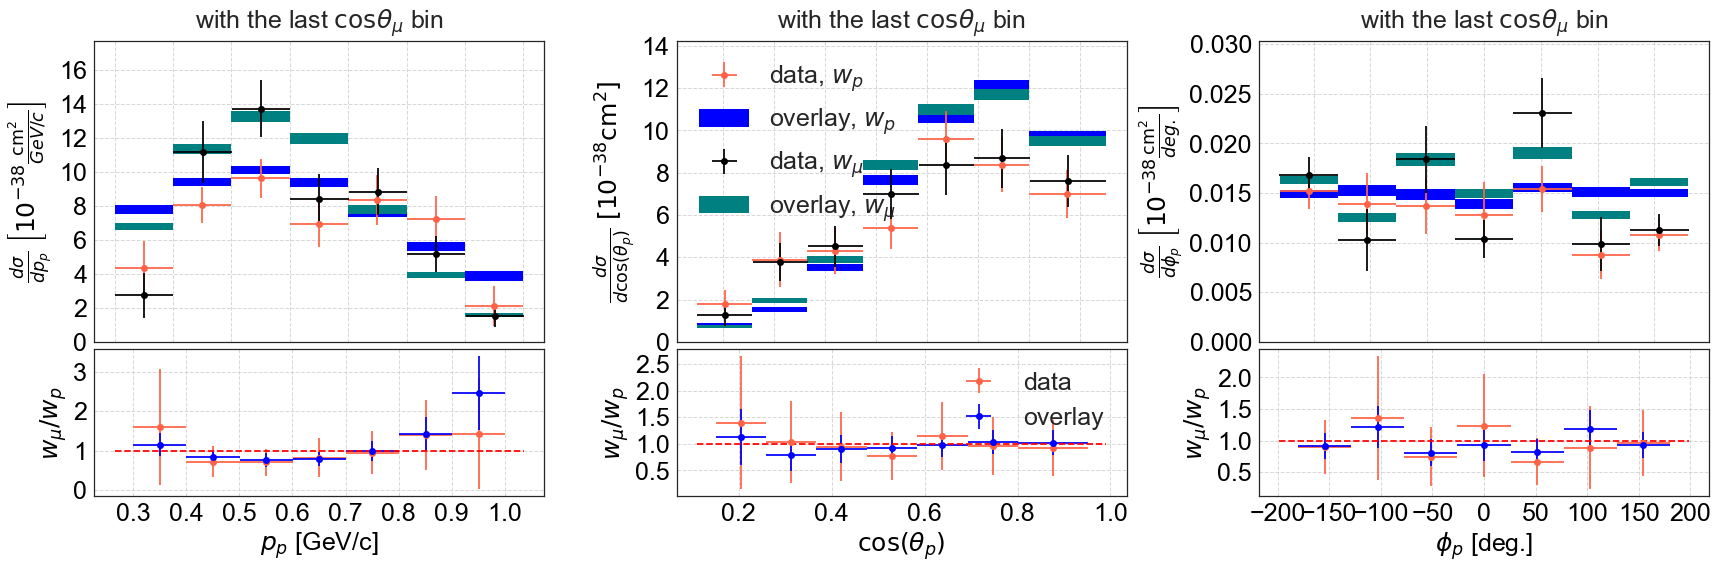

In [10]:
for particle,pname,other_pname in zip(['mu','p'],['\mu','p'],['p','\mu']):
    
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1Dcross-weights.txt", 'rb') as infile:#{
        cross_weights_Xsec_dicts = pickle.load(infile)
    #}
    for iXsec,(Xsec_title,Xsec_fname) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames)):#{
        fig=plt.figure(figsize=(24,8))            
        for i,(observable,ivar) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')'],[(1,4),(2,5),(3,6)])):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = nominal_Xsec_dicts[Xsec_title][observable],nominal_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = nominal_Xsec_dicts[Xsec_title]['mc '+observable], nominal_Xsec_dicts[Xsec_title]['mc '+observable+' err']
            h['Xsec cross_weight'],h['Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title][observable],cross_weights_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec cross_weight'],h['mc Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title]['mc '+observable], cross_weights_Xsec_dicts[Xsec_title]['mc '+observable+' err']

            ax = fig.add_subplot(3,3,ivar)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                h['Xsec cross_weight']=h['Xsec cross_weight'][:-1];h['Xsec cross_weight err']=h['Xsec cross_weight err'][:-1]
                h['mc Xsec cross_weight']=h['mc Xsec cross_weight'][:-1];h['mc Xsec cross_weight err']=h['mc Xsec cross_weight err'][:-1]

            ax = fig.add_subplot(3,3,ivar)        
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data, $w_'+pname+'$')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay, $w_'+pname+'$') 

            plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['Xsec cross_weight'],yerr=h['Xsec cross_weight err'],color='black',fmt='o',label='data, $w_'+other_pname+'$')
            ax.bar( x=mid , height=2*h['mc Xsec cross_weight err'], bottom=h['mc Xsec cross_weight']-h['mc Xsec cross_weight err'], width=bin_width, color='teal',label='overlay, $w_'+other_pname+'$') 
            set_axes(ax,'',y_label=get_Xsec_label(vlabel=vlabel,units=units),remove_ticks_x=True
                             ,do_add_grid=True,do_add_legend=True if 'cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())),title=Xsec_title
                            )
            
            # ratios of normal to cross-weights
            h['nominal/cross_weight'] = h['Xsec']/h['Xsec cross_weight']
            h['nominal/cross_weight err'] = h['nominal/cross_weight']* np.sqrt(h['Xsec err']/h['Xsec'] + h['Xsec cross_weight err']/h['Xsec cross_weight'])
            h['mc nominal/cross_weight'] = h['mc Xsec']/h['mc Xsec cross_weight']
            h['mc nominal/cross_weight err'] = h['mc nominal/cross_weight']* np.sqrt(h['mc Xsec err']/h['mc Xsec'] + h['mc Xsec cross_weight err']/h['mc Xsec cross_weight'])
            ax = fig.add_subplot(3,3,7+i) 
            plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['nominal/cross_weight'],yerr=h['nominal/cross_weight err'],color=Colors['beam on'],fmt='o',label='data')
            plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['mc nominal/cross_weight'],yerr=h['mc nominal/cross_weight err'],color=Colors['CC1p'],fmt='o',label='overlay')
            plt.plot(ax.get_xlim(),[1,1],'--',color='red')
            set_axes(ax,xlabel,y_label='$w_'+other_pname+'/w_'+pname+'$'                 
                     ,do_add_grid=True
                     ,do_add_legend=True if 'cos_theta' in var else False
                            )

        plt.tight_layout(h_pad=0.0)
        plt.subplots_adjust(hspace=0.05)
        save_figure(figures_path + 'Xsec_1D_P'+particle + '_' + Xsec_fname + '_cross-weights.pdf')

In [11]:
Xsec_sys_unc = dict()
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile: nominal_Xsec_dicts = pickle.load(infile)
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1Dcross-weights.txt", 'rb') as infile: cross_weights_Xsec_dicts = pickle.load(infile)

    for iXsec,(Xsec_title,Xsec_fname) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames)):#{
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']
                                     ):#{
            var,vture,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = nominal_Xsec_dicts[Xsec_title][observable],nominal_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = nominal_Xsec_dicts[Xsec_title]['mc '+observable], nominal_Xsec_dicts[Xsec_title]['mc '+observable+' err']
            h['Xsec cross_weight'],h['Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title][observable],cross_weights_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec cross_weight'],h['mc Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title]['mc '+observable], cross_weights_Xsec_dicts[Xsec_title]['mc '+observable+' err']

            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                h['Xsec cross_weight']=h['Xsec cross_weight'][:-1];h['Xsec cross_weight err']=h['Xsec cross_weight err'][:-1]
                h['mc Xsec cross_weight']=h['mc Xsec cross_weight'][:-1];h['mc Xsec cross_weight err']=h['mc Xsec cross_weight err'][:-1]
                
            Xsec_sys_unc[var + Xsec_fname + ' Xsec sys. err'] = 0.5*np.abs(h['Xsec cross_weight'] - h['Xsec'])
#             print var + Xsec_fname + ' Xsec sys. err',h['Xsec cross_weight'],h['Xsec']

In [12]:
Xsec_sys_unc

{'reco_Pmu_cos_thetawith_last_ctu_bin Xsec sys. err': array([ 0.07508671,  0.81444538,  0.20242691,  0.26733289,  0.10803151,
         0.16566842,  0.12495907]),
 'reco_Pmu_cos_thetawithout_last_ctu_bin Xsec sys. err': array([ 0.07508671,  0.81444538,  0.20242691,  0.26733289,  0.10803151,
         0.16566842]),
 'reco_Pmu_mcs_phiwith_last_ctu_bin Xsec sys. err': array([  5.90908843e-05,   4.36189234e-03,   6.53453504e-04,
          5.57436424e-04,   1.99374981e-03,   1.81818567e-03,
          7.03542384e-04]),
 'reco_Pmu_mcs_phiwithout_last_ctu_bin Xsec sys. err': array([ 0.00073554,  0.00368538,  0.0004122 ,  0.00139968,  0.00156531,
         0.00178949,  0.00093772]),
 'reco_Pmu_mcswith_last_ctu_bin Xsec sys. err': array([ 0.72362335,  0.08055327,  0.04167001,  0.07203027,  0.11062581,
         0.15504422,  0.03396345]),
 'reco_Pmu_mcswithout_last_ctu_bin Xsec sys. err': array([ 0.82535924,  0.11051982,  0.10304386,  0.05656032,  0.1690083 ,
         0.04929637,  0.00255823]),
 'rec

In [13]:
outfilename = Paths['systematics'] + "decoupling_2x3D_systemaitcal_uncertainty.txt"
with open(outfilename, 'w') as outfile:
    outfile.write(pickle.dumps(Xsec_sys_unc))
print 'saved',outfilename

saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/systematics/decoupling_2x3D_systemaitcal_uncertainty.txt


In [18]:
def draw_Xsecs_cross_weight(do_add_afro_genie = True, do_corr_phi_0=False, debug=0, particle='mu',
               do_P=True, do_cos_theta=True, do_phi=True,figsize=(24,8)):

    
    
    Xsec_cross_weight_dict = dict()
    if particle=='mu': other_particle = 'p'; pname='\mu'; other_pname='p';
    if particle=='p': other_particle = 'mu'; pname='p'; other_pname='\mu';
    for i,(observable,do_var) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')'],
                                               [do_P,do_cos_theta,do_phi])):#{
        if do_var==False: continue
        var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
        mul = 180./np.pi if 'phi' in observable else 1
        beam_on , beam_off , overlay , CC1p = selected_beam_on,selected_beam_off,selected_overlay_concat,selected_CC1p        
        beam_on = beam_on[beam_on['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        beam_off = beam_off[beam_off['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        overlay = overlay[overlay['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        CC1p = CC1p[CC1p['reco_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        h = get_Xsec_1d(beam_on,beam_off,overlay,CC1p
                        ,var=var,bins=bins,bin_width=bin_width,wname='P'+other_particle+' weight',mul=mul
                        ,do_corr_phi_0=do_corr_phi_0)
        if i==0:#{
            Xsec_cross_weight_dict['integrated Xsec'] = np.sum(h['Xsec']*bin_width)
            Xsec_cross_weight_dict['integrated Xsec err'] = np.sqrt(np.sum(np.square(h['Xsec err'])*bin_width))
            Xsec_cross_weight_dict['mc Xsec'] = np.sum(h['mc Xsec']*bin_width)
            Xsec_cross_weight_dict['mc Xsec err'] = np.sqrt(np.sum(np.square(h['mc Xsec err'])*bin_width))
        #}
        Xsec_cross_weight_dict[observable+' beam on'] = h['Xsec beam on']
        Xsec_cross_weight_dict[observable+' beam on err'] = h['Xsec beam on err']
        Xsec_cross_weight_dict[observable] = h['Xsec']
        Xsec_cross_weight_dict[observable+' err'] = h['Xsec err']
        Xsec_cross_weight_dict['mc '+observable] = h['mc Xsec']
        Xsec_cross_weight_dict['mc '+observable+' err'] = h['mc Xsec err']
    #}
    figurename = 'Xsec_1D_P'+particle 
    do_cos_theta = True
    Xsec_title = r'excluding the last $\cos\theta_\mu$ bin'
    Xsec_name = 'without_last_Pmu_cos_theta_bin'
    
    Xsec_dict = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug, particle=particle,
                                                   do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,
                                                  remove_last_cos_theta_mu_bin=True,                                                 
                                                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                                                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)
    
    fig=plt.figure(figsize=figsize)
    ratio = dict()
    for i,(observable,ivar) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')'],
                                                    [(1,4),(2,5),(3,6)])):
        var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
        mul = 180./np.pi if 'phi' in observable else 1
        h = dict()
        h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
        h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']

        ax = fig.add_subplot(3,3,ivar)
        plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data, $w_'+pname+'$')
        ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay, $w_'+pname+'$') 
        
        h['Xsec cross_weight'],h['Xsec cross_weight err'] = Xsec_cross_weight_dict[observable],Xsec_cross_weight_dict[observable+' err']
        h['mc Xsec cross_weight'],h['mc Xsec cross_weight err'] = Xsec_cross_weight_dict['mc '+observable], Xsec_cross_weight_dict['mc '+observable+' err']
        ax = fig.add_subplot(3,3,ivar)        
        plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['Xsec cross_weight'],yerr=h['Xsec cross_weight err'],color='black',fmt='o',label='data, $w_'+other_pname+'$')
        ax.bar( x=mid , height=2*h['mc Xsec cross_weight err'], bottom=h['mc Xsec cross_weight']-h['mc Xsec cross_weight err'], width=bin_width, color='teal',label='overlay, $w_'+other_pname+'$') 
        set_axes(ax,'',y_label=get_Xsec_label(vlabel=vlabel,units=units),remove_ticks_x=True
                         ,do_add_grid=True,do_add_legend=True if 'cos_theta' in var else False
                         ,ylim=(0,1.1*np.max(ax.get_ylim()))
                        )
        
        Xsec_sys_unc[var + Xsec_fname + ' Xsec sys. err up'] = (varying_Xsec_avg + varying_Xsec_std) - h['Xsec']


        
        # ratios of normal to cross-weights
        h['nominal/cross_weight'] = h['Xsec']/h['Xsec cross_weight']
        h['nominal/cross_weight err'] = h['nominal/cross_weight']* np.sqrt(h['Xsec err']/h['Xsec'] + h['Xsec cross_weight err']/h['Xsec cross_weight'])
        h['mc nominal/cross_weight'] = h['mc Xsec']/h['mc Xsec cross_weight']
        h['mc nominal/cross_weight err'] = h['mc nominal/cross_weight']* np.sqrt(h['mc Xsec err']/h['mc Xsec'] + h['mc Xsec cross_weight err']/h['mc Xsec cross_weight'])
        ax = fig.add_subplot(3,3,7+i) 
        plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['nominal/cross_weight'],yerr=h['nominal/cross_weight err'],color=Colors['beam on'],fmt='o',label='data')
        plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['mc nominal/cross_weight'],yerr=h['mc nominal/cross_weight err'],color=Colors['CC1p'],fmt='o',label='overlay')
        plt.plot(ax.get_xlim(),[1,1],'--',color='red')
        set_axes(ax,xlabel,y_label='$w_'+other_pname+'/w_'+pname+'$'                 
                 ,do_add_grid=True
                 ,do_add_legend=True if 'cos_theta' in var else False
                        )

    plt.tight_layout(h_pad=0.0)
    plt.subplots_adjust(hspace=0.05)
    save_figure(figures_path + figurename + '_' + Xsec_name + '_cross-weights.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in divide


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_without_last_Pmu_cos_theta_bin_cross-weights.pdf


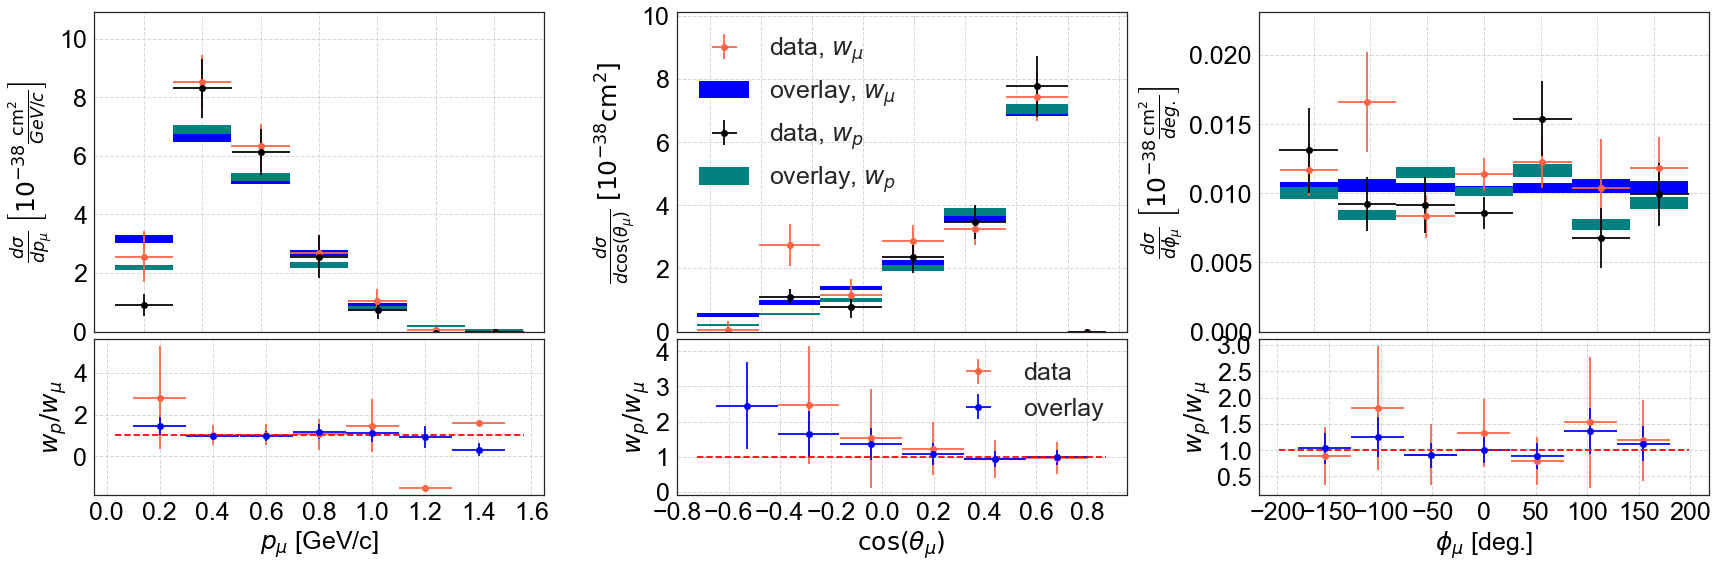

In [19]:
draw_Xsecs_cross_weight(do_add_afro_genie = True,do_corr_phi_0=True,debug=0,particle='mu',do_P=True,do_phi=True,figsize=(24,8));

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_without_last_Pmu_cos_theta_bin_cross-weights.pdf


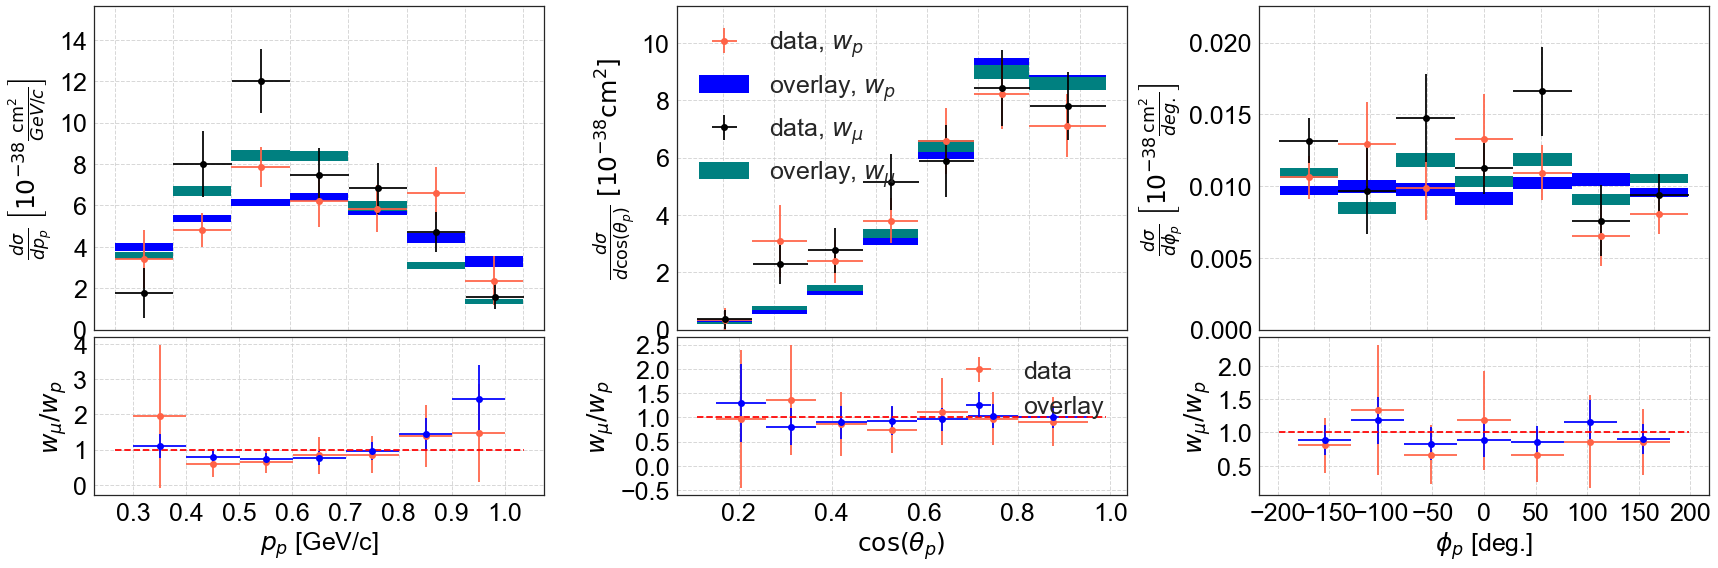

In [20]:
draw_Xsecs_cross_weight(do_add_afro_genie = True,do_corr_phi_0=True,debug=0,particle='p',do_P=True,do_phi=True,figsize=(24,8));

# save the differences as systematical uncertainties into a csv

In [ ]:
extract_Xsec_full_chain(evtwgt_name=evtwgt_name,extra_name='cross-weights')

In [ ]:
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}

    for iXsec,(Xsec_title,Xsec_fname,do_draw_Xsecs) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames,[True,do_last_ctu_bin])):#{
        if do_draw_Xsecs==False: continue
        fig=plt.figure(figsize=(24,8))            
        Xsec_dict = nominal_Xsec_dicts[Xsec_title]
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']
            ax = fig.add_subplot(1,3,i+1)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]

            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 

            varying_Xsec_avg = np.array(mean_varying_Xsec[particle][Xsec_title][var].values())
            varying_Xsec_std = np.array(std_varying_Xsec[particle][Xsec_title][var].values())
            ax.bar( x=mid , height=2*varying_Xsec_std, bottom=varying_Xsec_avg-varying_Xsec_std, width=bin_width, color='green',label='beam-flux variation',alpha=0.5)
            set_axes(ax,xlabel,y_label=get_Xsec_label(vlabel,units)
                             ,do_add_grid=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())))
            plt.title(Xsec_title, y=1.02,fontsize=25)
        plt.tight_layout(h_pad=0)
        save_figure(figures_path + 'beam_flux_uncertainty_'+particle+'_'+Xsec_fname+'.pdf')